In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Step 2: Load the Dataset
df = pd.read_csv("/content/Iris.csv")  # Ensure the correct path to the file


In [3]:
# Step 3: Prepare the Data
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Step 4: Univariate Regression (One Independent Variable)
def univariate_regression(feature, target):
    """Performs univariate regression and plots the regression line."""
    X = df[[feature]].values
    y = df[target].values

    # Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Model Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    r2 = r2_score(y_test, y_pred)

    # Plot Results
    plt.scatter(X_test, y_test, color="blue", label="Actual Data")
    plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Univariate Regression: {feature} vs {target} (R² = {r2:.2f})")
    plt.legend()
    plt.show()

    print(f"Univariate Regression - {feature} vs {target}")
    print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"R-squared Value: {r2:.4f}\n")


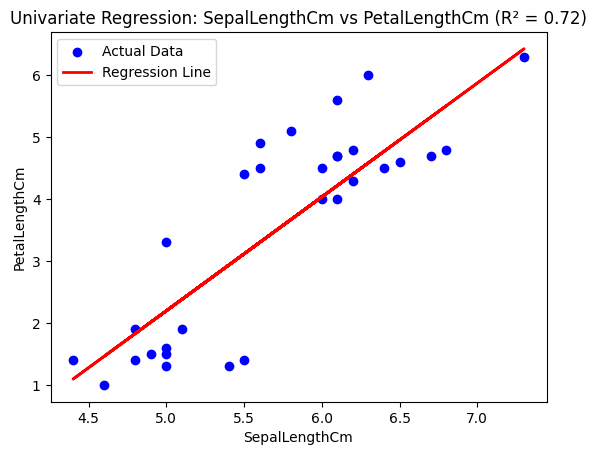

Univariate Regression - SepalLengthCm vs PetalLengthCm
Coefficient (Slope): 1.8381
Intercept: -6.9936
R-squared Value: 0.7214



In [7]:
# Example: Predicting PetalLengthCm using SepalLengthCm
univariate_regression("SepalLengthCm", "PetalLengthCm")


In [8]:
# Step 5: Bivariate Regression (Two Independent Variables)
def bivariate_regression(feature1, feature2, target):
    """Performs bivariate regression using two features and plots predictions."""
    X = df[[feature1, feature2]].values
    y = df[target].values

    # Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Model Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    r2 = r2_score(y_test, y_pred)

    print(f"Bivariate Regression - {feature1}, {feature2} vs {target}")
    print(f"Coefficients (Slopes): {model.coef_}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"R-squared Value: {r2:.4f}\n")

    # Scatter Plot
    sns.scatterplot(x=df[feature1], y=df[feature2], hue=df["Species"], palette="viridis")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Bivariate Scatter Plot: {feature1} vs {feature2}")
    plt.show()


Bivariate Regression - SepalWidthCm, SepalLengthCm vs PetalLengthCm
Coefficients (Slopes): [-1.34624918  1.7966746 ]
Intercept: -2.6396
R-squared Value: 0.8370



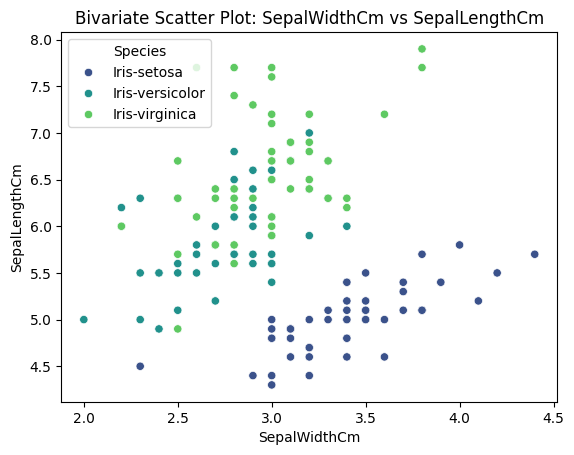

In [9]:
# Example: Predicting PetalLengthCm using SepalWidthCm and SepalLengthCm
bivariate_regression("SepalWidthCm", "SepalLengthCm", "PetalLengthCm")


In [10]:
# Step 6: Multivariate Regression (Multiple Independent Variables)
def multivariate_regression(features, target):
    """Performs multivariate regression using multiple features."""
    X = df[features].values
    y = df[target].values

    # Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Model Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    r2 = r2_score(y_test, y_pred)

    print(f"Multivariate Regression - {features} vs {target}")
    print(f"Coefficients (Slopes): {model.coef_}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"R-squared Value: {r2:.4f}\n")

    # Scatter Plot of Predictions vs Actual Values
    plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Multivariate Regression Predictions vs Actual ({target})")
    plt.legend()
    plt.show()


Multivariate Regression - ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'] vs PetalWidthCm
Coefficients (Slopes): [-0.19987362  0.20822671  0.52361786]
Intercept: -0.2276
R-squared Value: 0.8925



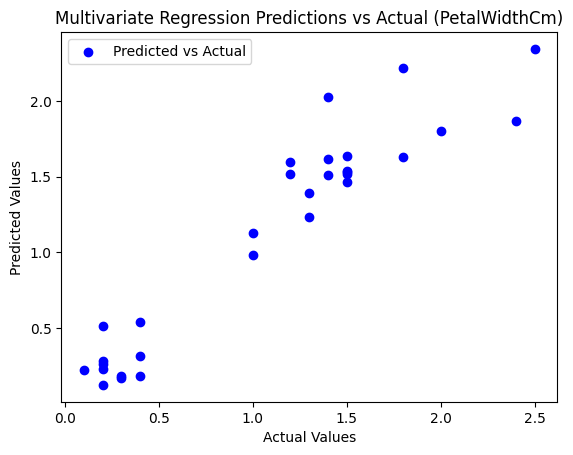

In [11]:
# Example: Predicting PetalWidthCm using all other features
multivariate_regression(["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"], "PetalWidthCm")


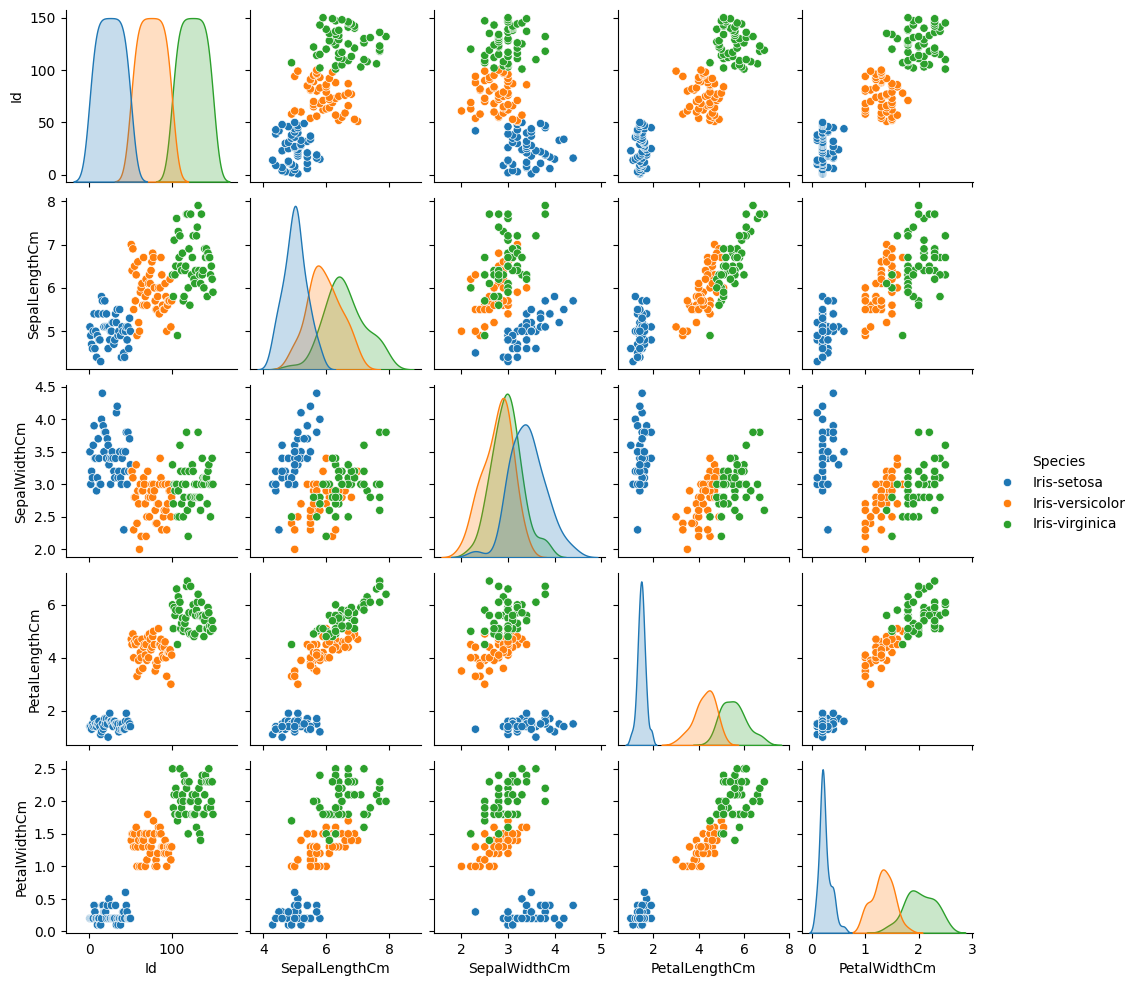

In [12]:
# Step 7: Data Visualization
sns.pairplot(df, hue="Species", height=2)
plt.show()
